In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.visualization import plot_histogram

D:\miniconda\lib\site-packages\qiskit\__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  "future release.", DeprecationWarning)


In [76]:
n = 4
grover_circuit = QuantumCircuit(n)

In [77]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [78]:
grover_circuit = initialize_s(grover_circuit, [0,1,2,3])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘

In [79]:
#create a phase oracle that will mark states  |w> = |0101> and |w> = |1010>
grover_circuit.cz(0,2) # Oracle
grover_circuit.cz(1,3) # Oracle
oracle_ex3 = grover_circuit.to_gate()
oracle_ex3.name = "U$_\omega$"

In [81]:
from qiskit import Aer
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result.assignment)

AttributeError: 'Grover' object has no attribute 'run'

In [53]:
from qiskit.algorithms import AmplificationProblem
problem = AmplificationProblem(oracle_ex3, is_good_state=['0101','1010'])
problem.grover_operator.state_preparation.draw()

AttributeError: 'Gate' object has no attribute 'num_ancillas'

In [43]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [44]:
n = 4
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2,3])
grover_circuit.append(oracle_ex3, [0,1,2,3])
grover_circuit.append(diffuser(n), [0,1,2,3])
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐┌─────────────┐┌────────┐ ░ ┌─┐         
   q_0: ┤ H ├┤0            ├┤0       ├─░─┤M├─────────
        ├───┤│             ││        │ ░ └╥┘┌─┐      
   q_1: ┤ H ├┤1            ├┤1       ├─░──╫─┤M├──────
        ├───┤│  U$_\omega$ ││  U$_s$ │ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├┤2            ├┤2       ├─░──╫──╫─┤M├───
        ├───┤│             ││        │ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤3            ├┤3       ├─░──╫──╫──╫─┤M├
        └───┘└─────────────┘└────────┘ ░  ║  ║  ║ └╥┘
meas: 4/══════════════════════════════════╩══╩══╩══╩═
                                          0  1  2  3

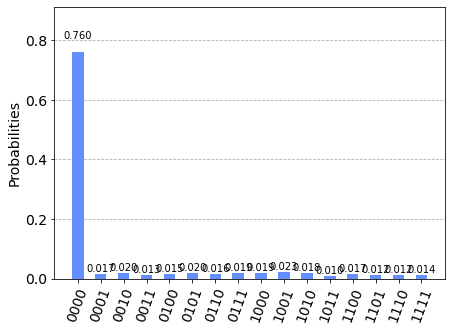

In [47]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

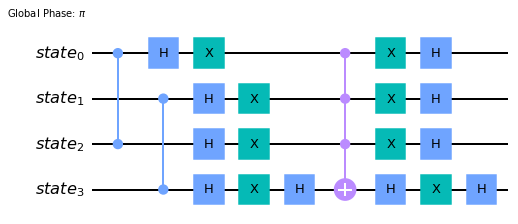

In [90]:
from qiskit import QuantumCircuit
from qiskit.algorithms import AmplificationProblem

# the state we desire to find is '11'
good_state = ['0101','1010']

# specify the oracle that marks the state '11' as a good solution
oracle = QuantumCircuit(4)
oracle.cz(0,2) # Oracle
oracle.cz(1,3) # Oracle

# define Grover's algorithm
problem = AmplificationProblem(oracle, is_good_state=good_state)

# now we can have a look at the Grover operator that is used in running the algorithm
problem.grover_operator.draw(output='mpl')

In [104]:
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover

aer_simulator = Aer.get_backend('aer_simulator')
grover = Grover(iterations=3,quantum_instance=aer_simulator)
result = grover.amplify(problem)
print('Result type:', type(result))
print()
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)

Result type: <class 'qiskit.algorithms.amplitude_amplifiers.grover.GroverResult'>

Success!
Top measurement: 1010


In [105]:
import pylab
import numpy as np
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

In [106]:
truthtable = '0000010000100000'

D:\miniconda\lib\site-packages\qiskit\aqua\algorithms\amplitude_amplifiers\grover.py:216: DeprecationWarning: The package qiskit.aqua.algorithms.amplitude_amplifiers is deprecated. It was moved/refactored to qiskit.algorithms.amplitude_amplifiers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  'qiskit.algorithms.amplitude_amplifiers', 'qiskit-terra')
D:\miniconda\lib\site-packages\qiskit\aqua\quantum_instance.py:137: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  'qiskit-terra')


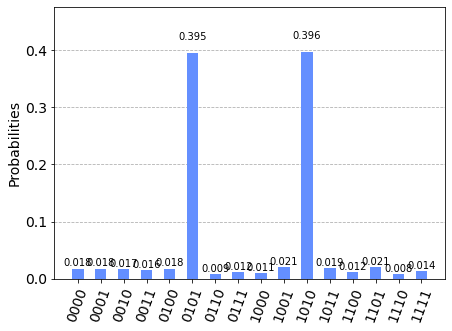

In [107]:
oracle = TruthTableOracle(truthtable)
grover = Grover(oracle)
result = grover.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024))
plot_histogram(result.measurement)